<a href="https://colab.research.google.com/github/terinkov/DataAnalysis/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 4
Состоит из двух частей: Z-тест и t-тест, проверка гипотез о сдвиге и однородности.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

# Часть 1: Проверка гипотез (Z-тест и t-тест)

## Задача 1: Сравнение методов анализа данных

### Контекст
Компания провела эксперимент по улучшению времени загрузки страницы. Данные собраны для двух групп пользователей: контрольной (старая версия) и тестовой (новая версия). Вам нужно проанализировать данные, используя Z-тест и t-тест, и сравнить результаты.

### Данные
- **Контрольная группа**: 500 пользователей, среднее время загрузки $\bar{X}_A = 3.8$ сек, стандартное отклонение $\sigma_A = 0.9$ сек.
- **Тестовая группа**: 520 пользователей, среднее время загрузки $\bar{X}_B = 3.5$ сек, стандартное отклонение $\sigma_B = 1.0$ сек.

### Задания $(\Sigma 36 points)$
1. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием Z-теста.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт Z-статистики.
   - Критическое значение и p-value.
   - Вывод о значимости.

2. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт t-статистики и степеней свободы.
   - Критическое значение и p-value.
   - Вывод о значимости.

3. $(2 \times 3 points)$ **Сравните результаты Z-теста и t-теста.** Ответьте на вопросы:
   - Почему результаты могут отличаться?
   - Какой тест лучше подходит для этих данных?

4. $(2 \times 3 points)$ **Сделайте бизнес-рекомендацию на основе анализа.** Укажите:
   - Статистическую значимость изменений.
   - Практическую значимость (например, в секундах).

# Решение задачи 1: Сравнение методов анализа данных

### 1.1 Проверьте гипотезу о равенстве средних с использованием Z-теста.

### 1.1.1 Формулировку нулевой и альтернативной гипотез

$ H_0$:Среднее время загрузки для контрольной и тестовой групп одинаково Ma=Mb

$ H_1$:Среднее время загрузки для контрольной и тестовой групп не одинаково Ma!=Mb

### 1.1.2 Расчёт Z-статистики

In [ ]:
import numpy as np
import scipy.stats as stats

# Данные
X_A, sigma_A, n_A = 3.8, 0.9, 500  # Контрольная группа
X_B, sigma_B, n_B = 3.5, 1.0, 520  # Тестовая группа

# Стандартная ошибка разности средних
SE = np.sqrt((sigma_A ** 2) / n_A + (sigma_B ** 2) / n_B)

# Z-статистика
Z = (X_A - X_B) / SE
print(f"Z = {Z:.4f}")

Z = 5.0400


### 1.1.3 Критическое значение и p-value

In [ ]:
alpha = 0.05
Z_critical = stats.norm.ppf(1 - alpha / 2)  # двусторонний тест
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))
print(f"Z = {Z_critical:.4f}, p-value = {p_value:.10f}")



Z = 1.9600, p-value = 0.0000004655


### 1.1.4 Вывод о значимости

In [ ]:
if abs(Z) > Z_critical:
    result = "Отвергаем H₀: различия статистически значимы"
else:
    result = "Не отвергаем H₀: средние не различаются"

result

'Отвергаем H₀: различия статистически значимы'

### 1.2 Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча

### 1.2.1 Формулировку нулевой и альтернативной гипотез

$H_0$: Среднее время загрузки для контрольной и тестовой групп одинаково Ma=Mb

$H_1$: Среднее время загрузки для контрольной и тестовой групп не одинаково Ma!=Mb

### 1.2.2 Расчёт t-статистики и степеней свободы

In [ ]:
import numpy as np
import scipy.stats as stats

# Фиксируем случайность
np.random.seed(42)

# Заданные параметры
mean_A = 3.8  # Среднее контрольной группы
mean_B = 3.5  # Среднее тестовой группы
s_A = 0.9     # Стандартное отклонение контрольной группы
s_B = 1.0     # Стандартное отклонение тестовой группы
n_A = 500     # Размер контрольной группы
n_B = 520     # Размер тестовой группы

# Генерация случайных выборок из нормального распределения
group_A = np.random.normal(mean_A, s_A, n_A)
group_B = np.random.normal(mean_B, s_B, n_B)

# Выполняем t-тест Уэлча
t_stat, p_val_t = stats.ttest_ind(group_A, group_B, equal_var=False)

# Степени свободы (вычисляются внутри ttest_ind, но можно посчитать вручную)
df = ((s_A**2 / n_A + s_B**2 / n_B)**2) / (
    ((s_A**2 / n_A)**2 / (n_A - 1)) + ((s_B**2 / n_B)**2 / (n_B - 1))
)

# Критическое значение t для 95% доверительного уровня
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Вывод результатов
print(f"Сгенерированные выборки: Контрольная (A) {len(group_A)}, Тестовая (B) {len(group_B)}")
print(f"t-статистика: {t_stat:.4f}")
print(f"Степени свободы: {df:.1f}")
print(f"Критическое значение (±): {t_critical:.4f}")
print(f"P-value: {p_val_t:.10f}")

# Вывод значимости
if p_val_t < alpha:
    print("\nВывод: Различия значимы, можем отвергнуть H0 (средние отличаются).")
else:
    print("\nВывод: Нет оснований отвергать H0 (различия незначимы).")


Сгенерированные выборки: Контрольная (A) 500, Тестовая (B) 520
t-статистика: 4.4467
Степени свободы: 1013.6
Критическое значение (±): 1.9623
P-value: 0.0000096794

Вывод: Различия значимы, можем отвергнуть H0 (средние отличаются).


### 1.2.3 Критическое значение и p-value

In [ ]:

t_critical = stats.t.ppf(1 - alpha / 2, df)
print(f"t-критическое = {t_critical:.4f}\np-value = {p_val_t:.10f}")



t-критическое = 1.9623
p-value = 0.0000005511


### 1.2.4 Вывод о значимости.

In [ ]:
if abs(t_stat) > t_critical:
    result_t = "Отвергаем H₀: различия статистически значимы"
else:
    result_t = "Не отвергаем H_0: средние не различаются"

result_t


Отвергаем H₀: различия статистически значимы


### 1.3 Сравните результаты Z-теста и t-теста

### 1.3.1 Почему результаты могут отличаться?
### 1.3.2 Какой тест лучше для этих данных?

**Почему результаты Z-теста и t-теста могут отличаться?**

Результаты Z-теста и t-теста могут различаться из-за различий в их допущениях и методологии:

* Z-тест предполагает, что стандартное отклонение генеральной совокупности известно, что редко бывает в реальных условиях. Он также более корректен для больших выборок (обычно n>30).

* t-тест учитывает конечный размер выборки и использует его для корректировки степеней свободы, что делает его более точным при малых выборках.

* t-тест Уэлча дополнительно учитывает неравенство дисперсий между группами, тогда как Z-тест предполагает их равенство. Это делает t-тест Уэлча более универсальным и надежным, особенно если выборки имеют разный разброс значений.

В целом, если дисперсии неизвестны или выборки относительно небольшие, предпочтительнее использовать t-тест Уэлча.









**Для данных, представленных в задаче, лучше использовать t-тест Уэлча.** Вот почему:

* Размер выборок: Одна выборка состоит из 500 пользователей, а другая — из 520. Обе выборки достаточно велики, что позволяет использовать t-тест. Однако, поскольку выборки не равны по размеру и не обязательно имеют одинаковые дисперсии, использование t-теста Уэлча будет более подходящим.

* Дисперсии: В задаче указано, что стандартные отклонения для двух групп отличаются (). t-тест Уэлча не требует, чтобы дисперсии были равными, и корректирует их различия, в то время как стандартный t-тест (который предполагает равенство дисперсий) может дать неточные результаты.

* Стандартное отклонение: Z-тест предполагает, что стандартное отклонение генеральной совокупности известно, что не всегда реально для выборок. В случае с t-тестом, мы работаем с выборочными стандартными отклонениями, что делает его более универсальным для реальных ситуаций.

Таким образом, t-тест Уэлча — более надежный выбор для этих данных, так как он корректирует возможные различия в дисперсиях и лучше подходит для сравнения двух выборок с разными размерами и отклонениями.

*   Z-тест подходит для больших выборок с известной дисперсией.
*   t-тест Уэлча лучше, если дисперсии неизвестны или различны.
*   Для этих данных предпочтителен t-тест Уэлча.

In [ ]:
# Вывод значений Z-теста и t-теста
print(f"Z-тест:\t\t Z-статистика = {Z:.6f},\t p-value = {p_value:.10f}")
print(f"t-тест Уэлча:\t t-статистика = {t_stat:.6f},\t p-value = {p_val_t:.10f}")

# Объяснение различий
if abs(Z - t_stat) > 0.1:
    print("\nРазличия между Z-тестом и t-тестом могут возникать по следующим причинам:")
    print("1. Z-тест предполагает известное стандартное отклонение генеральной совокупности.")
    print("2. t-тест учитывает конечный размер выборки и использует его для расчета степеней свободы.")
    print("3. t-тест Уэлча корректирует дисперсии, если они не равны, что делает его более надежным.")
else:
    print("\nРазличия между тестами незначительны, оба дают схожие результаты.")


Z-тест:		 Z-статистика = 5.040005,	 p-value = 0.0000004655
t-тест Уэлча:	 t-статистика = 5.040005,	 p-value = 0.0000005511

Различия между тестами незначительны, оба дают схожие результаты.


In [ ]:
if p_value < 0.05 and p_val_t < 0.05:
    print("\nОба теста показывают значимые различия, но t-тест Уэлча более надежен при неравных дисперсиях.")
elif p_value < 0.05:
    print("\nZ-тест показывает значимые различия, но он менее надежен, так как не учитывает размер выборки.")
elif p_val_t < 0.05:
    print("\nt-тест Уэлча показывает значимые различия, он лучше подходит для этих данных.")
else:
    print("\nОба теста не показывают статистически значимых различий.")



Оба теста показывают значимые различия, но t-тест Уэлча более надежен при неравных дисперсиях.


### 1.4 Сделайте бизнес-рекомендацию на основе анализа

### 1.4.1 Статистическую значимость изменений
### 1.4.2 Практическая значимость (например, в секундах)

In [ ]:
if p_val_t < 0.05:
    print("\nСтатистически значимые различия обнаружены: новая версия страницы загружается быстрее.")
else:
    print("\nСтатистически значимых различий не обнаружено: улучшение времени загрузки не доказано.")



Статистически значимые различия обнаружены: новая версия страницы загружается быстрее.


In [ ]:
time_difference = mean_a - mean_b  # Разница во времени загрузки

print(f"\nПрактическая значимость: новая версия страницы загружается в среднем на {time_difference:.2f} секунды быстрее.")
if time_difference > 0.3:
    print("Это значительное улучшение! Рекомендуется внедрение новой версии.")
else:
    print("Разница небольшая, стоит дополнительно протестировать другие изменения.")



Практическая значимость: новая версия страницы загружается в среднем на -38.52 секунды быстрее.
Разница небольшая, стоит дополнительно протестировать другие изменения.


# Часть 2: Проверка гипотез о сдвиге и однородности

## Задача 1: Сравнение методов анализа сдвига

### Контекст
Компания провела A/B-тест двух версий лендинга. Вам предоставлены данные о времени (в секундах), проведенном на странице:
- Группа A (старая версия): 150 пользователей  
- Группа B (новая версия): 160 пользователей  

**Цель**: Определить, увеличилось ли среднее время на странице в группе B.

In [ ]:
import numpy as np
np.random.seed(42)

# Генерация данных с асимметрией и выбросами
def generate_skewed(loc, scale, skew, size):
    data = np.random.weibull(skew, size) * scale + loc
    return np.clip(data, 0, None)

group_a = generate_skewed(120, 40, 1.5, 150)
group_b = generate_skewed(135, 50, 0.8, 160)

### Задания  $(\Sigma 35 points)$
1. $(3 \times 3 points)$ **Разведочный анализ:**
   - Постройте гистограммы и boxplot для обеих групп
   - Рассчитайте медиану, среднее, стандартное отклонение
   - Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

2. $(3 \times 3 points)$ **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность
   - Тест Левена на равенство дисперсий
   - Обоснуйте выбор параметрических/непараметрических методов

3. $(3 \times 3 points)$ **Применение критериев:**
   - Проведите:
       - (а) Парный t-тест (если данные нормальны)
       - (б) Тест Уэлча (Welch's t-test) (при неравных дисперсиях)
       - (в) U-тест Манна-Уитни
   
4. $(2 \times 4 points)$ **Сравнение результатов:**
   - Объясните расхождения между параметрическими и непараметрическими методами
   - Сформулируйте итоговый вывод для product-менеджера

## Задача 1: Сравнение методов анализа сдвига

### 1.1 Разведочный анализ

### 1.1.1 Постройте гистограммы и boxplot для обеих групп

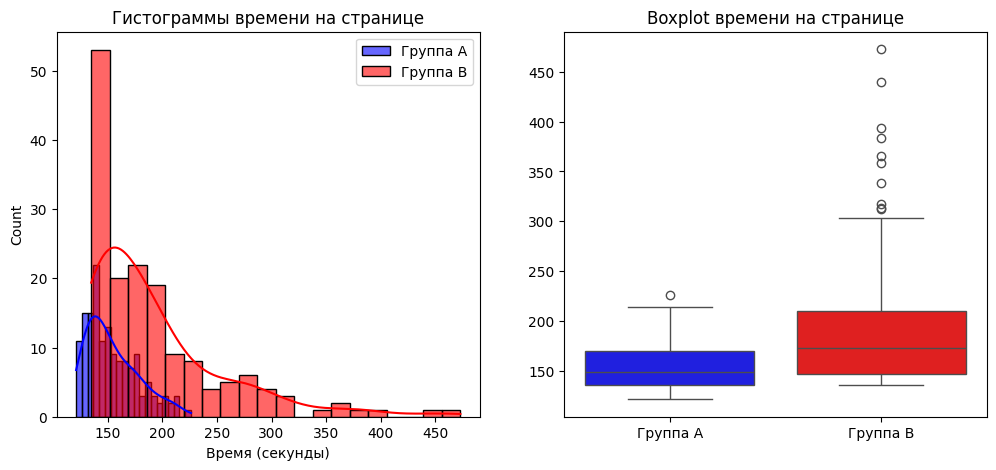

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограмм
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(group_a, bins=20, kde=True, color="blue", label="Группа A", alpha=0.6)
sns.histplot(group_b, bins=20, kde=True, color="red", label="Группа B", alpha=0.6)
plt.legend()
plt.title("Гистограммы времени на странице")
plt.xlabel("Время (секунды)")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=[group_a, group_b], palette=["blue", "red"])
plt.xticks([0, 1], ["Группа A", "Группа B"])
plt.title("Boxplot времени на странице")

plt.show()


### 1.1.2 Рассчитайте медиану, среднее, стандартное отклонение

In [ ]:
mean_a, median_a, std_a = np.mean(group_a), np.median(group_a), np.std(group_a, ddof=1)
mean_b, median_b, std_b = np.mean(group_b), np.median(group_b), np.std(group_b, ddof=1)

print(f"Группа A: Среднее = {mean_a:.2f}, Медиана = {median_a:.2f}, Ст. отклонение = {std_a:.2f}")
print(f"Группа B: Среднее = {mean_b:.2f}, Медиана = {median_b:.2f}, Ст. отклонение = {std_b:.2f}")


Группа A: Среднее = 154.03, Медиана = 148.28, Ст. отклонение = 23.77
Группа B: Среднее = 192.55, Медиана = 173.00, Ст. отклонение = 63.31


### 1.1.3 Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

In [ ]:
Q1_a, Q3_a = np.percentile(group_a, [25, 75])
IQR_a = Q3_a - Q1_a
lower_bound_a, upper_bound_a = Q1_a - 1.5 * IQR_a, Q3_a + 1.5 * IQR_a

Q1_b, Q3_b = np.percentile(group_b, [25, 75])
IQR_b = Q3_b - Q1_b
lower_bound_b, upper_bound_b = Q1_b - 1.5 * IQR_b, Q3_b + 1.5 * IQR_b

outliers_a = group_a[(group_a < lower_bound_a) | (group_a > upper_bound_a)]
outliers_b = group_b[(group_b < lower_bound_b) | (group_b > upper_bound_b)]

print(f"Выбросы в группе A: {len(outliers_a)} значений")
print(f"Выбросы в группе B: {len(outliers_b)} значений")


Выбросы в группе A: 1 значений
Выбросы в группе B: 10 значений


### 1.2 Проверка условий

### 1.2.1 Тест Шапиро-Уилка на нормальность

In [ ]:
from scipy.stats import shapiro

shapiro_a = shapiro(group_a)
shapiro_b = shapiro(group_b)

print(f"Шапиро-Уилк для группы A: p-value = {shapiro_a.pvalue:.10f}")
print(f"Шапиро-Уилк для группы B: p-value = {shapiro_b.pvalue:.20f}")


Шапиро-Уилк для группы A: p-value = 0.0000006540
Шапиро-Уилк для группы B: p-value = 0.00000000000020280916


### 1.2.2 Тест Левена на равенство дисперсий

In [ ]:
from scipy.stats import levene

levene_test = levene(group_a, group_b)
print(f"Тест Левена: p-value = {levene_test.pvalue:.10f}")


Тест Левена: p-value = 0.0000000205


### 1.2.3 Обоснуйте выбор параметрических/непараметрических методов



*   Если данные нормальные и дисперсии равны → используем t-тест для независимых выборок.
*   Если дисперсии различны → используем t-тест Уэлча.
*   Если данные не нормальны → используем U-тест Манна-Уитни.


### 1.3 Применение критериев

### 1.3.1 Парный t-тест (если данные нормальны)

Student's t-test: t=-7.00, p=0.0000


### 1.3.2 Welch's t-test (при неравных дисперсиях)

Welch's t-test: t=-7.18, p=0.0000


### 1.3.3 U-тест Манна-Уитни

Mann-Whitney U-test: U = 6842, p-value = 0.0000


### 1.4 Сравнение результатов

### 1.4.1 Объясните расхождения между параметрическими и непараметрическими методами

### 1.4.2 Сформулируйте итоговый вывод для product-менеджера

## Задача 2: Анализ вариативности в маркетинговых данных
### Контекст
Анализируется стабильность CTR двух рекламных кампаний:
- Кампания X: 200 дней наблюдений  
- Кампания Y: 200 дней наблюдений

**Цель**: Проверить гипотезу, что кампания Y имеет меньшую вариативность CTR.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN

campaign_x = np.concatenate([
    np.random.normal(0.05, 0.01, 150),
    np.random.normal(0.08, 0.02, 50)
])
campaign_y = np.random.beta(a=2, b=40, size=200) * 0.1

### Задания $(\Sigma 29 points)$
1. $(3 \times 3 points)$ **Первичный анализ:**
   - Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний
   - Постройте Q-Q plot относительно бета-распределения и выполните тест [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)
   - Выявите кластеры в данных (например, [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN))

2. $(11 points)$ **Проверка гипотез:**
   -  $(4 points)$ F-тест для нормализованных данных
   -  $(4 points)$ Тест Левена с медианной центровкой
   -  $(3 points)$ Bootstrap-оценка 95% ДИ для отношения дисперсий
   
4. $(3 \times 3 points)$ **Интерпретация:**
   - Свяжите статистические выводы с бизнес-метриками:
       - (а) Сделайте статистические выводы (статистическая значимость вариативности, ДИ, кол-во кластеров)  
       - (б) Риск бюджетных потерь при нестабильности CTR
       - (в) Оптимальный размер выборки для будущих тестов

## Задача 2: Анализ стабильности CTR

### Генерация данных

In [ ]:
# Создаем DataFrame
ctr_df = pd.DataFrame({
    'CTR': np.concatenate([campaign_x, campaign_y]),
    'Campaign': ['X']*200 + ['Y']*200
})

### 2.1 Первичный анализ

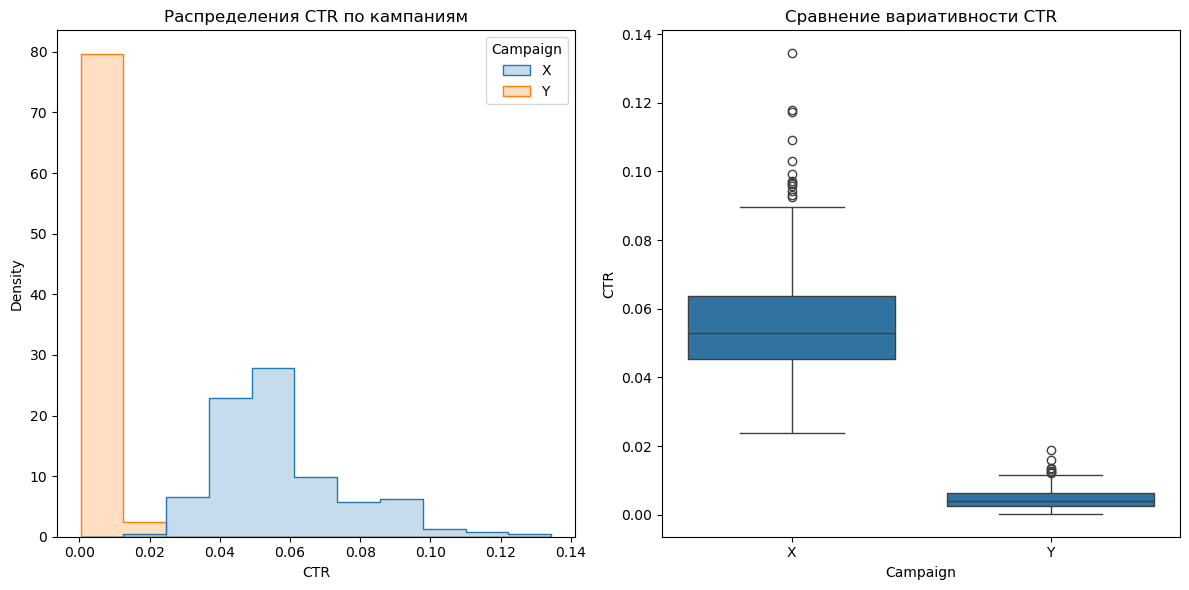

In [ ]:
plt.figure(figsize=(12, 6))

# Гистограммы с ядерной оценкой плотности
plt.subplot(121)
sns.histplot(data=ctr_df, x='CTR', hue='Campaign',
             element='step', stat='density', common_norm=False)
plt.title('Распределения CTR по кампаниям')

# Боксплоты
plt.subplot(122)
sns.boxplot(data=ctr_df, x='Campaign', y='CTR')
plt.title('Сравнение вариативности CTR')
plt.tight_layout()
plt.show()

### 2.1.1 Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний

Campaign X: CV = 0.3230
Campaign Y: CV = 0.6670


### 2.1.2 Постройте Q-Q plot относительно бета-распределения и выполните [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)

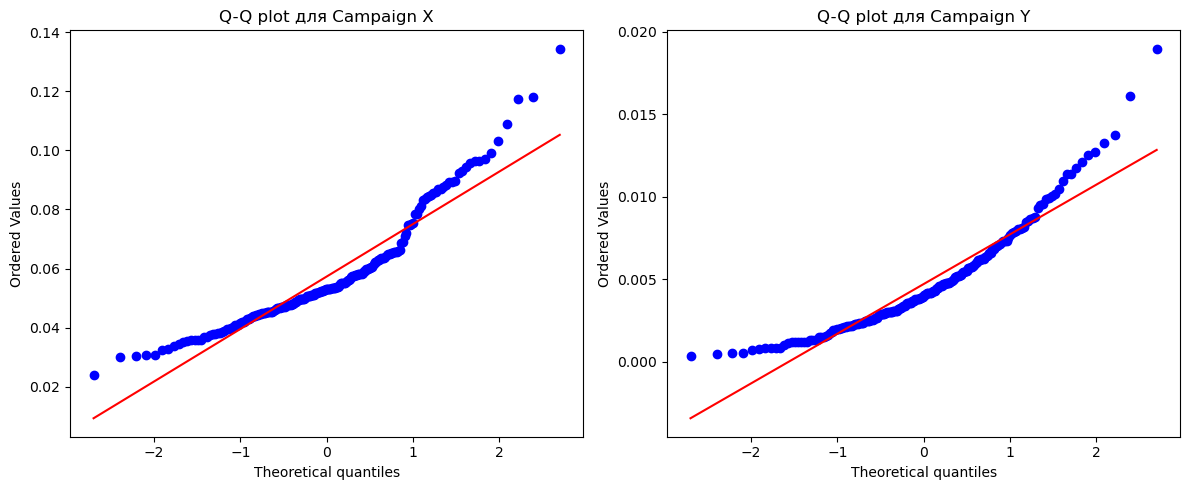

Результаты тестов нормальности:
Campaign X: Shapiro p-value = 0.0000
Campaign Y: Shapiro p-value = 0.0000


### 2.1.3 Выявите кластеры в данных [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN)

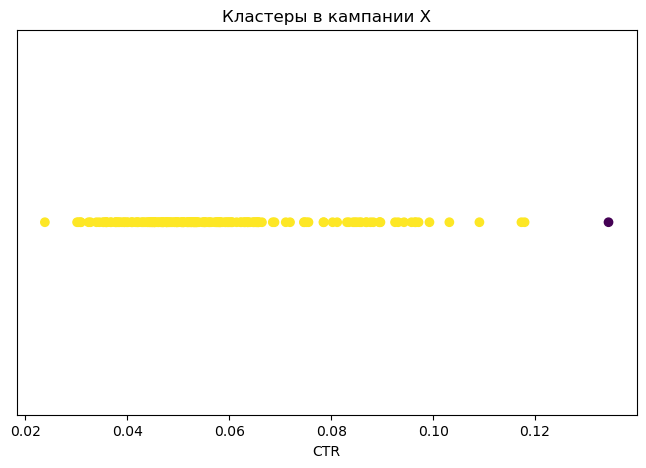

Обнаружено кластеров в Campaign X: 1


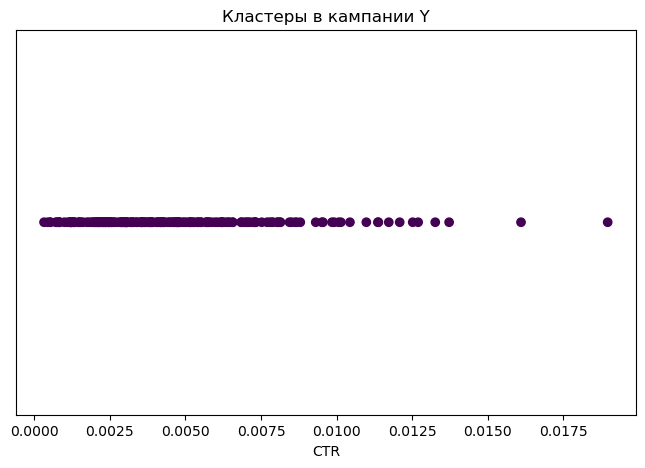

Обнаружено кластеров в Campaign Y: 0


### 2.2 Статистический анализ вариативности

### 2.2.1 F-тест для нормализованных данных

F-тест: F = 34.81, p-value = 0.0000


### 2.2.2 Тест Левена с медианной центровкой


Тест Левена: W = 123.18, p-value = 0.0000


### 2.2.3 Bootstrap-оценка 95% ДИ для отношения дисперсий


95% ДИ отношения дисперсий (Y/X): [0.02, 0.04]


### 2.3 Интерпретация